In [42]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [44]:
df = pd.read_csv(r'C:\Users\gopip\Downloads\Cleaned-Life-Exp.csv')


In [46]:
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1.621762,-0.459399,-0.443691,0.790238,0.268824,-1.133571,-0.335570,-0.635971,-0.110384,...,-3.268019,0.889486,-0.730578,-0.323445,-0.483546,0.343993,2.796805,2.757185,-0.704483,-0.563614
1,Afghanistan,1.404986,-0.459399,-0.979279,0.854614,0.285786,-1.133571,-0.334441,-0.755661,-0.168124,...,-1.048077,0.897493,-0.857092,-0.323445,-0.481553,-0.203706,2.864687,2.801550,-0.718710,-0.593391
2,Afghanistan,1.188210,-0.459399,-0.979279,0.830473,0.302749,-1.133571,-0.334594,-0.675868,-0.173531,...,-0.877312,0.877476,-0.772749,-0.323445,-0.480218,0.311126,2.909942,2.845914,-0.747164,-0.623168
3,Afghanistan,0.971434,-0.459399,-1.021286,0.862660,0.328193,-1.133571,-0.332096,-0.556178,0.032045,...,-0.663856,1.033609,-0.646235,-0.323445,-0.477539,-0.148469,2.955197,2.912461,-0.780360,-0.652944
4,Afghanistan,0.754658,-0.459399,-1.052791,0.886801,0.345155,-1.133571,-0.367862,-0.516281,0.051757,...,-0.621165,0.773387,-0.604064,-0.323445,-0.520044,-0.160246,3.023079,2.956826,-0.823042,-0.742275
5,Afghanistan,0.537882,-0.459399,-1.094798,0.918989,0.370599,-1.133571,-0.331344,-0.596074,-0.037556,...,-0.706547,1.305842,-0.688407,-0.323445,-0.485714,-0.161810,3.068333,3.001190,-0.851496,-0.831606
6,Afghanistan,0.321106,-0.459399,-1.115802,0.935083,0.396043,-1.133571,-0.342874,-0.715764,0.038499,...,-0.834621,1.393918,-0.814920,-0.323445,-0.493244,-0.204415,3.113588,3.067737,-0.917889,-0.920936
7,Afghanistan,0.104330,-0.459399,-1.168310,0.983365,0.421487,-1.128635,-0.358415,-0.675868,-0.071572,...,-0.791930,0.957544,-0.772749,-0.323445,-0.498328,-0.164330,3.158843,3.112102,-0.922631,-0.980490
8,Afghanistan,-0.112446,-0.459399,-1.231321,1.047740,0.438450,-1.131103,-0.365944,-0.715764,-0.111518,...,-0.834621,0.316996,-0.814920,-0.323445,-0.498575,0.227274,3.204097,3.156466,-1.007994,-1.069820
9,Afghanistan,-0.329222,-0.459399,-1.252324,1.047740,0.455412,-1.128635,-0.362793,-0.675868,-0.037469,...,-1.048077,0.597236,-1.025777,-0.323445,-0.505393,-0.166627,3.249352,3.200831,-1.055417,-1.159151


In [48]:
df.shape

(2938, 22)

In [50]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   float64
 2   Status                           2938 non-null   float64
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   float64
 12  Polio               

In [54]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [56]:
df.duplicated().sum()


0

In [58]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.369453e-14,1.000170,-1.629878,-0.762774,0.104330,0.971434,1.621762
Status,2938.0,1.233413e-16,1.000170,-0.459399,-0.459399,-0.459399,-0.459399,2.176759
Life expectancy,2938.0,1.284142e-04,0.999561,-3.457687,-0.643224,0.301932,0.677369,2.076724
Adult Mortality,2938.0,-3.753395e-04,0.998839,-1.318060,-0.730634,-0.167348,0.506583,4.491830
infant deaths,2938.0,0.000000e+00,1.000170,-0.257017,-0.257017,-0.231573,-0.070428,15.009326
Alcohol,2938.0,-1.962432e-02,0.985558,-1.767049,-0.899100,-0.240113,0.729856,3.274483
percentage expenditure,2938.0,5.320606e-17,1.000170,-0.371433,-0.369076,-0.338774,-0.149286,9.429403
Hepatitis B,2938.0,-1.070416e-01,1.007555,-3.189357,-0.396359,0.311926,0.600825,0.804604
Measles,2938.0,2.902149e-17,1.000170,-0.211036,-0.211036,-0.209553,-0.179615,18.295468
BMI,2938.0,-1.204857e-02,1.002242,-1.862284,-0.957869,0.233464,0.887138,2.443979


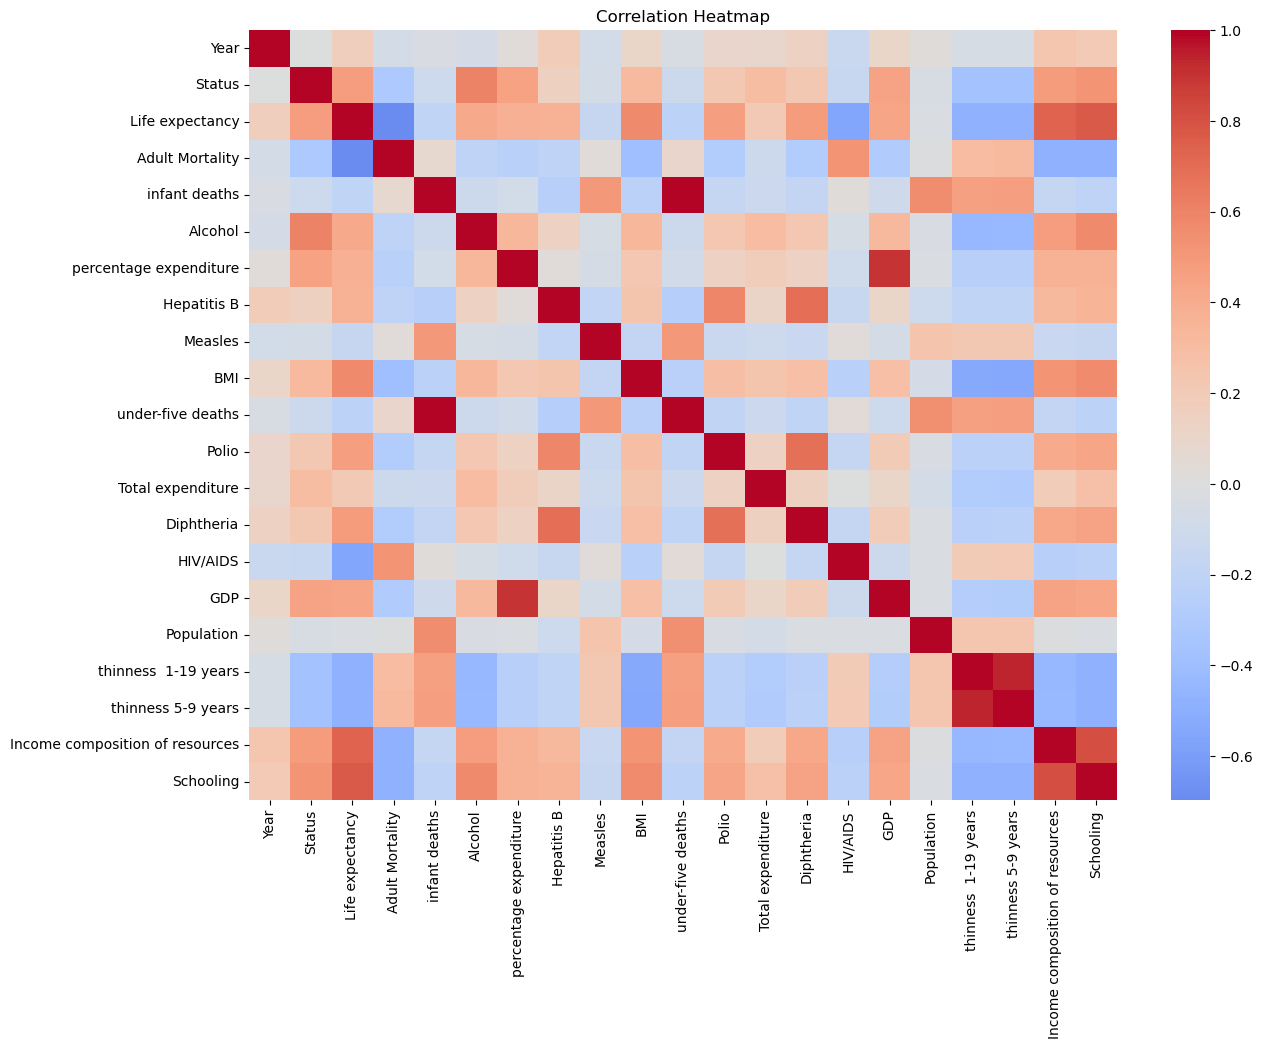

In [59]:
plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

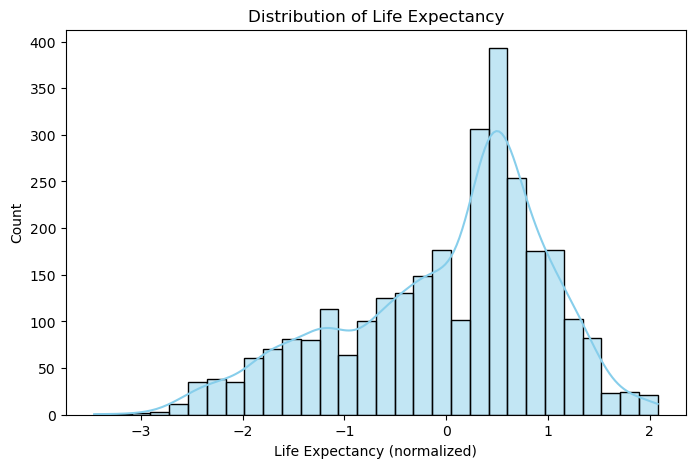

In [61]:
plt.figure(figsize=(8,5))
sns.histplot(df["Life expectancy"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy (normalized)")
plt.ylabel("Count")
plt.show()

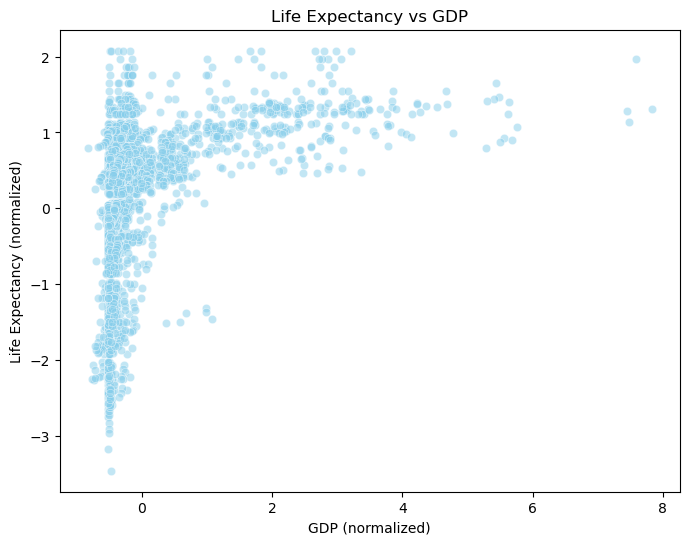

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="GDP", y="Life expectancy", data=df, alpha=0.5, color="skyblue")
plt.title("Life Expectancy vs GDP")
plt.xlabel("GDP (normalized)")
plt.ylabel("Life Expectancy (normalized)")
plt.show()

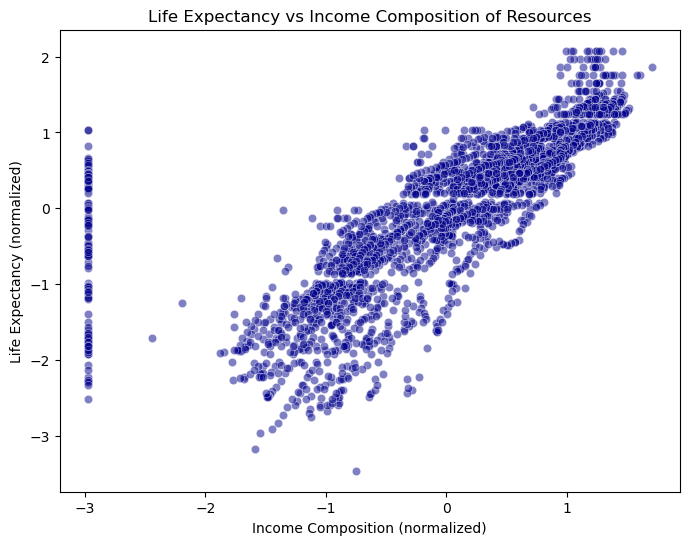

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Income composition of resources", y="Life expectancy", data=df, alpha=0.5, color="darkblue")
plt.title("Life Expectancy vs Income Composition of Resources")
plt.xlabel("Income Composition (normalized)")
plt.ylabel("Life Expectancy (normalized)")
plt.show()

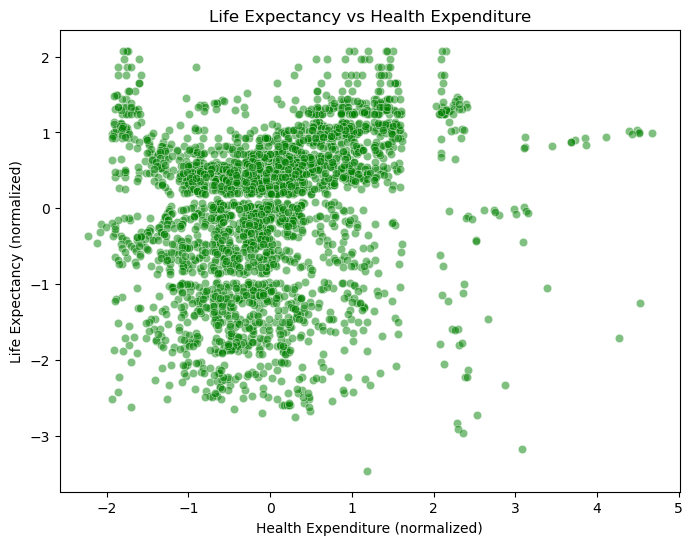

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Total expenditure", y="Life expectancy", data=df, alpha=0.5, color="green")
plt.title("Life Expectancy vs Health Expenditure")
plt.xlabel("Health Expenditure (normalized)")
plt.ylabel("Life Expectancy (normalized)")
plt.show()

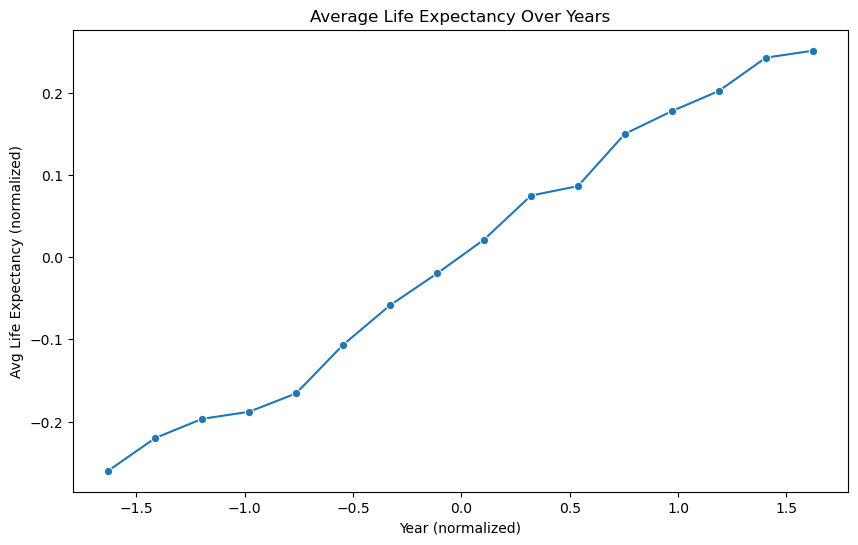

In [65]:
plt.figure(figsize=(10,6))
yearly_trend = df.groupby("Year")["Life expectancy"].mean()
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o")
plt.title("Average Life Expectancy Over Years")
plt.xlabel("Year (normalized)")
plt.ylabel("Avg Life Expectancy (normalized)")
plt.show()

In [66]:
fig = px.scatter(df, x = 'percentage expenditure', y = 'Life expectancy', color = 'Status', 
                 title = 'Relation Of Life Expectancy With Expenditure On Healthcare')
fig.update_traces(marker_line_color = 'sienna', marker_line_width = 1, marker_size = 9)
fig.update_layout(title = {'font_color' : 'rebeccapurple', 'x' : 0.5, 'y' : 0.9,
                           'xanchor' : 'center', 'yanchor' : 'top'},
                  font_color = 'burlywood')
fig.show()

In [67]:
correlation = df.corr(numeric_only = True)
correlation

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.001864,0.169590,-0.079278,-0.037415,-0.065912,0.031400,0.197841,-0.082493,0.109703,...,0.097626,0.090303,0.137787,-0.139741,0.105161,0.022581,-0.048383,-0.051432,0.242170,0.209493
Status,-0.001864,1.000000,0.481376,-0.314881,-0.112252,0.603330,0.454261,0.153526,-0.076955,0.313953,...,0.221909,0.303780,0.218632,-0.148590,0.449379,-0.045008,-0.370542,-0.368851,0.487844,0.525895
Life expectancy,0.169590,0.481376,1.000000,-0.696561,-0.196353,0.414547,0.381160,0.374444,-0.157428,0.570549,...,0.470382,0.216871,0.484297,-0.555889,0.443216,-0.027582,-0.481332,-0.475448,0.741218,0.767789
Adult Mortality,-0.079278,-0.314881,-0.696561,1.000000,0.078814,-0.207477,-0.242509,-0.212281,0.031242,-0.393301,...,-0.279729,-0.117052,-0.280109,0.523653,-0.291561,-0.007562,0.308948,0.314107,-0.480557,-0.478550
infant deaths,-0.037415,-0.112252,-0.196353,0.078814,1.000000,-0.117828,-0.085612,-0.250616,0.501128,-0.226488,...,-0.169860,-0.130737,-0.174266,0.025231,-0.105537,0.558406,0.464584,0.470329,-0.160168,-0.208503
Alcohol,-0.065912,0.603330,0.414547,-0.207477,-0.117828,1.000000,0.340482,0.133357,-0.051701,0.339633,...,0.230918,0.306566,0.230257,-0.050425,0.323916,-0.034811,-0.440234,-0.428939,0.479511,0.573899
percentage expenditure,0.031400,0.454261,0.381160,-0.242509,-0.085612,0.340482,1.000000,0.028609,-0.056596,0.231015,...,0.148716,0.173268,0.145136,-0.097857,0.899958,-0.023477,-0.253316,-0.254793,0.371627,0.375748
Hepatitis B,0.197841,0.153526,0.374444,-0.212281,-0.250616,0.133357,0.028609,1.000000,-0.181475,0.247296,...,0.584728,0.116425,0.694897,-0.149050,0.100183,-0.106928,-0.194567,-0.196319,0.320424,0.352805
Measles,-0.082493,-0.076955,-0.157428,0.031242,0.501128,-0.051701,-0.056596,-0.181475,1.000000,-0.173334,...,-0.134580,-0.107260,-0.140201,0.030899,-0.072216,0.253105,0.223050,0.219450,-0.145815,-0.153456
BMI,0.109703,0.313953,0.570549,-0.393301,-0.226488,0.339633,0.231015,0.247296,-0.173334,1.000000,...,0.291933,0.248577,0.290607,-0.243649,0.288284,-0.064503,-0.536729,-0.543227,0.525444,0.567547


In [69]:
fig = px.imshow(correlation, text_auto = '.3f', title = 'Correlation Matrix',
                color_continuous_scale = 'oranges', aspect = 'auto')
fig.update_layout(title = {'font_color' : 'saddlebrown', 'x' : 0.5,  'y' : 0.9,
                            'xanchor' : 'center', 'yanchor' : 'top'},
                   font_color = 'peru')
fig.show()

In [70]:
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(df["GDP"], df["Life expectancy"])
print("Pearson Correlation Coefficient between GDP and Life Expectancy:", round(corr_coef, 3))
print("p-value:", p_value)

Pearson Correlation Coefficient between GDP and Life Expectancy: 0.443
p-value: 1.2228647364841722e-141


In [72]:
from scipy.stats import ttest_ind

median_gdp = df["GDP"].median()
high_income = df[df["GDP"] > median_gdp]["Life expectancy"]
low_income = df[df["GDP"] <= median_gdp]["Life expectancy"]

# Perform independent t-test
t_stat, p_val = ttest_ind(high_income, low_income, equal_var=False)

print("T-test Results: Life Expectancy (High vs Low Income Countries)")
print("T-statistic:", round(t_stat, 3))
print("p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("Significant difference in life expectancy between high and low income countries.")
else:
    print("No significant difference in life expectancy between high and low income countries.")


T-test Results: Life Expectancy (High vs Low Income Countries)
T-statistic: 35.02
p-value: 1.340002634814662e-221
Significant difference in life expectancy between high and low income countries.


In [74]:
df = df.drop(columns = ['Country', 'Year', 'Total expenditure', 'Population'], axis = 1)

In [75]:
X = df.drop('Life expectancy', axis = 1)
y = df['Life expectancy']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)


In [79]:
forest = RandomForestRegressor(n_estimators = 200, random_state = 2)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=2)

In [81]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
pred_forest = forest.predict(X_test)

r2_forest = r2_score(y_test, pred_forest)
print("R2 Score is:", r2_forest)

rmse_forest = root_mean_squared_error(y_test, pred_forest)
print("Root Mean Squared Error is:", rmse_forest)

R2 Score is: 0.9606849608243323
Root Mean Squared Error is: 0.20671130771117557


In [82]:
gradient = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.06, 
                                     min_samples_split = 10, min_samples_leaf = 10,
                                     random_state = 2)

gradient.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.06, min_samples_leaf=10,
                          min_samples_split=10, n_estimators=1000,
                          random_state=2)

In [83]:
from sklearn.metrics import r2_score, root_mean_squared_error
pred_gradient = gradient.predict(X_test)

r2_gradient = r2_score(y_test, pred_gradient)
print("R2 Score is:", r2_gradient)

rmse_gradient = root_mean_squared_error(y_test, pred_gradient)
print("Root Mean Squared Error is:", rmse_gradient)

R2 Score is: 0.961079029825194
Root Mean Squared Error is: 0.2056727271605674


In [84]:
from sklearn.linear_model import LinearRegression
X_train_numeric = X_train.select_dtypes(include=["number"])
X_test_numeric = X_test.select_dtypes(include=["number"])

linear = LinearRegression()
linear.fit(X_train_numeric, y_train)

LinearRegression()

In [87]:
ridge = Ridge(alpha = 1e-2)

ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [88]:
from sklearn.metrics import r2_score, root_mean_squared_error

pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, pred_ridge)
print("R² Score is:", r2_ridge)
rmse_ridge = root_mean_squared_error(y_test, pred_ridge)
print("Root Mean Squared Error is:", rmse_ridge)


R² Score is: 0.8250411938081144
Root Mean Squared Error is: 0.4360665575642641


In [95]:
linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

In [96]:
from sklearn.metrics import r2_score, root_mean_squared_error

pred_linear = linear.predict(X_test)
r2_linear = r2_score(y_test, pred_linear)
print("R² Score is:", r2_linear)
rmse_linear = root_mean_squared_error(y_test, pred_linear)
print("Root Mean Squared Error is:", rmse_linear)


R² Score is: 0.8250470805750202
Root Mean Squared Error is: 0.436059221426607


In [97]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e+0, 1e+1, 1e+2, 1e+3, 1e+4]

ridgecv = RidgeCV(alphas = alphas)

ridgecv.fit(X_train, y_train)

RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0])

In [98]:
from sklearn.metrics import r2_score, root_mean_squared_error
pred_ridgecv = ridgecv.predict(X_test)
r2_ridgecv = r2_score(y_test, pred_ridgecv)
print("R² Score is:", r2_ridgecv)
rmse_ridgecv = root_mean_squared_error(y_test, pred_ridgecv)
print("Root Mean Squared Error is:", rmse_ridgecv)


R² Score is: 0.8249883781075009
Root Mean Squared Error is: 0.4361323714074826


In [99]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 1000, learning_rate = 0.06, max_depth = 10,
                         random_state = 2)

regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [100]:
from sklearn.metrics import r2_score, root_mean_squared_error

pred_regressor = regressor.predict(X_test)
r2_regressor = r2_score(y_test, pred_regressor)
print("R² Score is:", r2_regressor)

rmse_regressor = root_mean_squared_error(y_test, pred_regressor)
print("Root Mean Squared Error is:", rmse_regressor)


R² Score is: 0.9630616206753468
Root Mean Squared Error is: 0.20036589306971922


In [101]:
from sklearn.metrics import r2_score, root_mean_squared_error

# --- Random Forest ---
pred_forest = forest.predict(X_test)
r2_forest = r2_score(y_test, pred_forest)
rmse_forest = root_mean_squared_error(y_test, pred_forest)

# --- Gradient Boosting ---
pred_gradient = gradient.predict(X_test)
r2_gradient = r2_score(y_test, pred_gradient)
rmse_gradient = root_mean_squared_error(y_test, pred_gradient)

# --- XGBoost ---
pred_regressor = regressor.predict(X_test)
r2_regressor = r2_score(y_test, pred_regressor)
rmse_regressor = root_mean_squared_error(y_test, pred_regressor)

# --- Linear Regression ---
pred_linear = linear.predict(X_test)
r2_linear = r2_score(y_test, pred_linear)
rmse_linear = root_mean_squared_error(y_test, pred_linear)

# --- Ridge ---
pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, pred_ridge)
rmse_ridge = root_mean_squared_error(y_test, pred_ridge)

# --- RidgeCV ---
pred_ridgecv = ridgecv.predict(X_test)
r2_ridgecv = r2_score(y_test, pred_ridgecv)
rmse_ridgecv = root_mean_squared_error(y_test, pred_ridgecv)


In [102]:
comparison = pd.DataFrame()

comparison['Type'] = ['Random Forest Regressor', 'Gradient Boosting Regressor', 
                      'XGBRegressor', 'LinearRegression', 'Ridge', 'RidgeCV']
comparison['r2 Score'] = [r2_forest, r2_gradient, r2_regressor, r2_linear, r2_ridge,
                          r2_ridgecv]
comparison['Root Mean Squared Error'] = [rmse_forest, rmse_gradient, rmse_regressor,
                                         rmse_linear, rmse_ridge, rmse_ridgecv]

comparison

,Type,r2 Score,Root Mean Squared Error
0,Random Forest Regressor,0.960685,0.206711
1,Gradient Boosting Regressor,0.961079,0.205673
2,XGBRegressor,0.963062,0.200366
3,LinearRegression,0.825047,0.436059
4,Ridge,0.825041,0.436067
5,RidgeCV,0.824988,0.436132


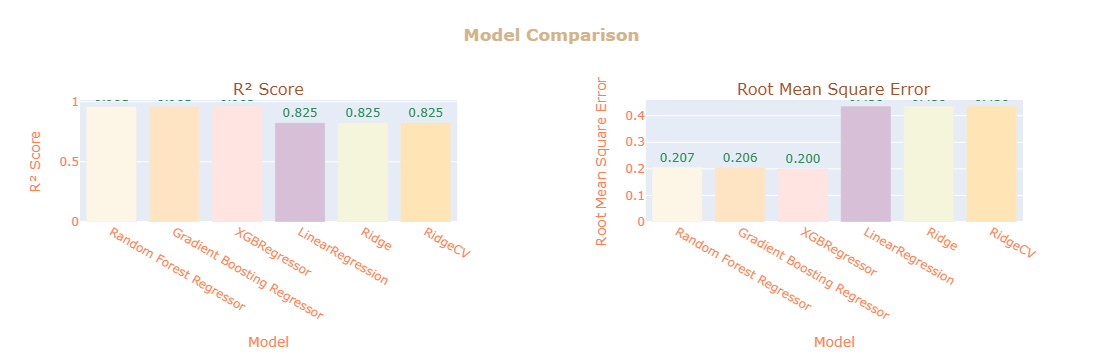

In [104]:
from plotly.subplots import make_subplots
import plotly.express as px

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'bar'}, {'type': 'bar'}]],
    subplot_titles=['R² Score', 'Root Mean Square Error'],
    horizontal_spacing=0.2
)

# Use the exact column names from your DataFrame
fig1 = px.bar(comparison, x='Type', y='r2 Score', text_auto='.3f')
fig2 = px.bar(comparison, x='Type', y='Root Mean Squared Error', text_auto='.3f')

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)

fig.update_xaxes(title_text='Model', row=1, col=1)
fig.update_xaxes(title_text='Model', row=1, col=2)

fig.update_traces(
    textposition='outside', 
    textfont_color='seagreen', 
    marker_color=['oldlace', 'bisque', 'mistyrose', 'thistle', 'beige', 'moccasin']
)
fig.update_annotations(font_color='sienna')

fig.update_layout(
    title={
        'text': '<b>Model Comparison</b>',
        'x': 0.5,
        'y': 0.92,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color': 'tan'
    },
    font_color='coral',
    yaxis={'title': 'R² Score'},
    yaxis2={'title': 'Root Mean Square Error'}
)

fig.show()
